In [1]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

In [2]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [3]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print len(contours)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

In [9]:
image = cv2.imread('../../img/original/img7.jpg')

In [10]:
def run(image):
    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize to a third of the size
    image = cv2.resize(image, None, fx=1/3, fy=1/3)
    
    # Blur image slightly
    image_blur = cv2.GaussianBlur(image, (7, 7), 0)
    
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
    
    # 170-180 hue
    min_red2 = np.array([80, 0, 180])
    max_red2 = np.array([150, 256, 256])
    image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)
    
    # Clean up
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

    # image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
    # show_mask(image_red_eroded)

    # image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
    # show_mask(image_red_dilated)

    # image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
    # show_mask(image_red_opened)

    # Fill small gaps
    image_red_closed = cv2.morphologyEx(image_red2, cv2.MORPH_CLOSE, kernel)
    show_mask(image_red_closed)

    # Remove specks
    image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)

    big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
    
    # --
    overlay_mask(red_mask, image)
    
    
    #
    # Centre of mass
    moments = cv2.moments(red_mask)
    centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
    image_with_com = image.copy()
    cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.CV_AA)
    show(image_with_com)

    # Bounding ellipse
    image_with_ellipse = image.copy()
    ellipse = cv2.fitEllipse(big_contour)
    cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
    show(image_with_ellipse)
    


2


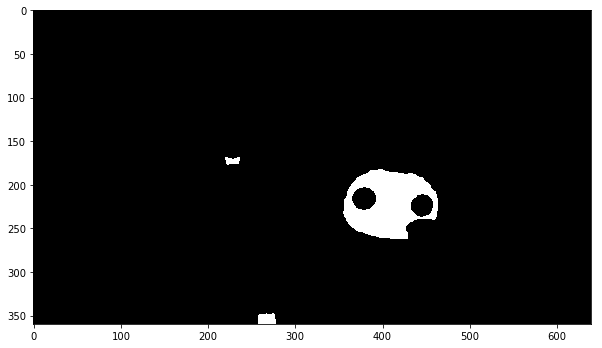

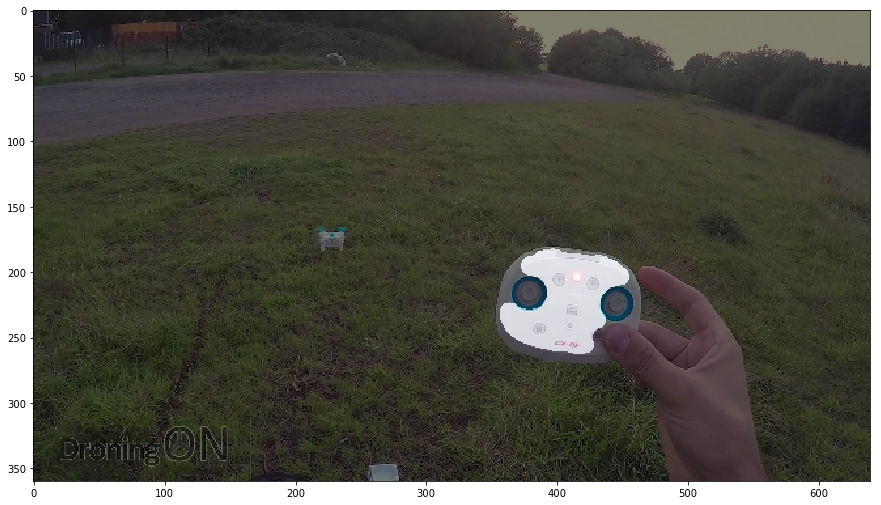

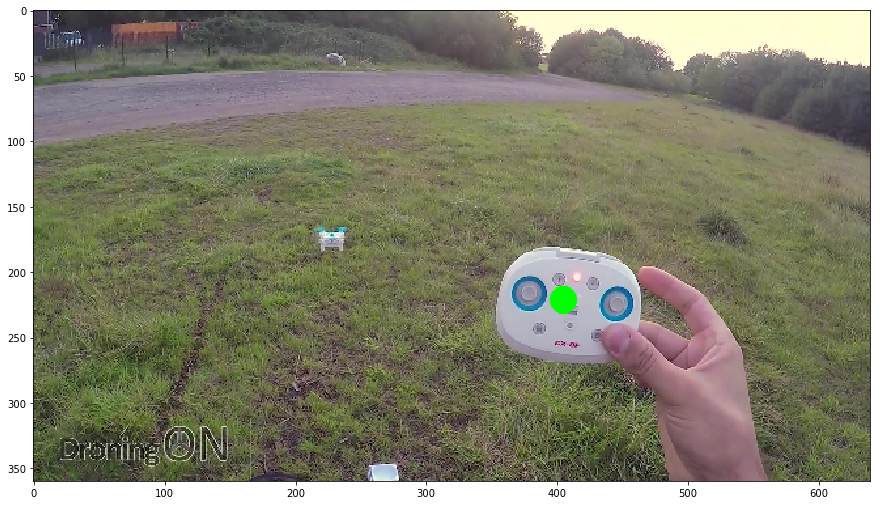

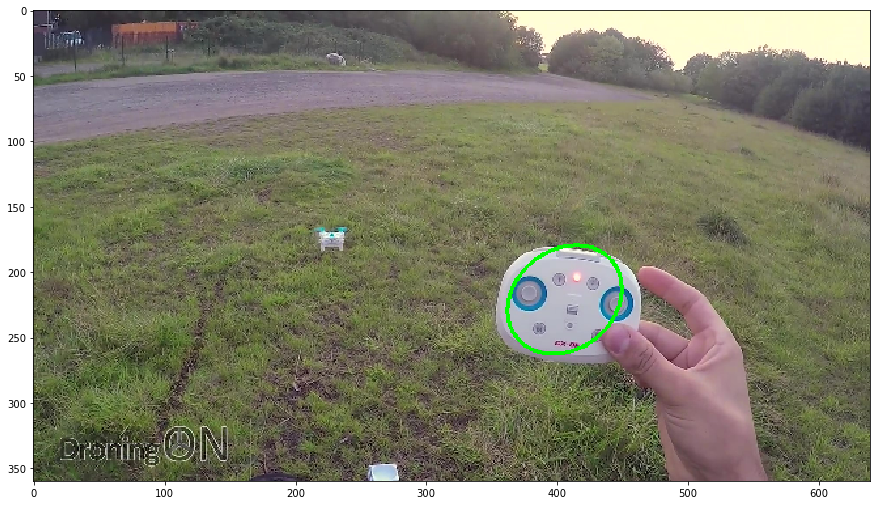

In [18]:
run(cv2.imread('../../img/original/img1.jpg'))